In [1]:
# Please load this first

library(tidyverse)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Run this to load the data sets and display the summarized means for players.csv

players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

summarized_players <- summarize(players, mean_age = mean(Age, na.rm = TRUE), mean_played_hours = mean(played_hours))

summarized_players
# summary_sessions



Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


### Data Description

##### Data file 1 - players.csv
- 196 rows (observations) and 7 columns (variables)
- Each row corresponds to a unique player
    - experience (character)
        - This variable indicates the experience level of each MineCraft player. There are five unique experience levels: "Beginner", "Amateur", "Regular", "Pro" and "Veteran". These variables could be changed to be of the 'factor' data type.
    - subscribe (factor)
      - This variable contains TRUE or FALSE logical values, indicating whether a player is subscribed to a gaming newsletter.
    - hashedEmail (character)
      - This variable contains the player's email addresses, hashed for privacy.
    - played_hours (double)
      - This variable indicates the total number of hours played on the MineCraft server by each player.
      - The mean value of played_hours is 5.85.
    - name (character)
      - This variable reports the first name of each player.
    - gender (character)
      - This variable reports the gender identity of each player. This variable's data type could be changed from 'character' to 'factor.
    - Age (double)
      - This variable contains the age of each player. This variable's data type could be changed from 'double' to 'integer'.
      - The mean value of Age is 21.14.

##### Data file 2 - sessions.csv
- 1535 rows (observations) and 5 columns (variables)
- Each row corresponds to a unique play session.
    - hashedEmail (character)
      - This variable contains the player's email addresses, hashed for privacy.
    - start_time (character)
      - Describes the start date and time of a player's play session.
    - end_time (character)
      - Describes the end date and time of a player's play session.
    - original_start_time (double)
      - Contains the start time of a player's play session in UNIX timestamp form.
    - original_end_time (double)
      - Contains the end time of a player's play session in UNIX timestamp form.
     
For most play sessions, the original_start_time and original_end_time values appear the same as the UNIX timestamp values were not recorded to include enough decimal points, so the difference of the two values often won't communicate the total play time of a session.

##### Question:
For this project, I will be looking into the following question of interest: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?" Using this topic, I plan to determine if 'Age' and 'played_hours' can accurately predict 'subscribe' in 'players.csv'. 

### Data Analysis and Visualization

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


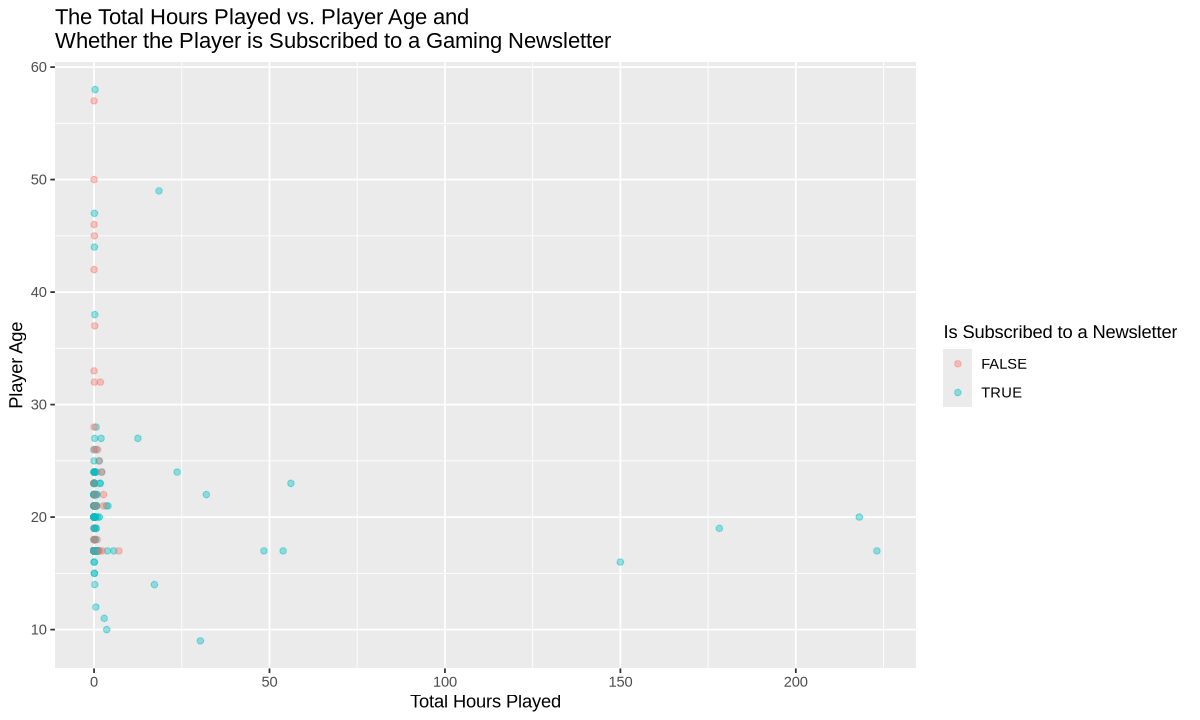

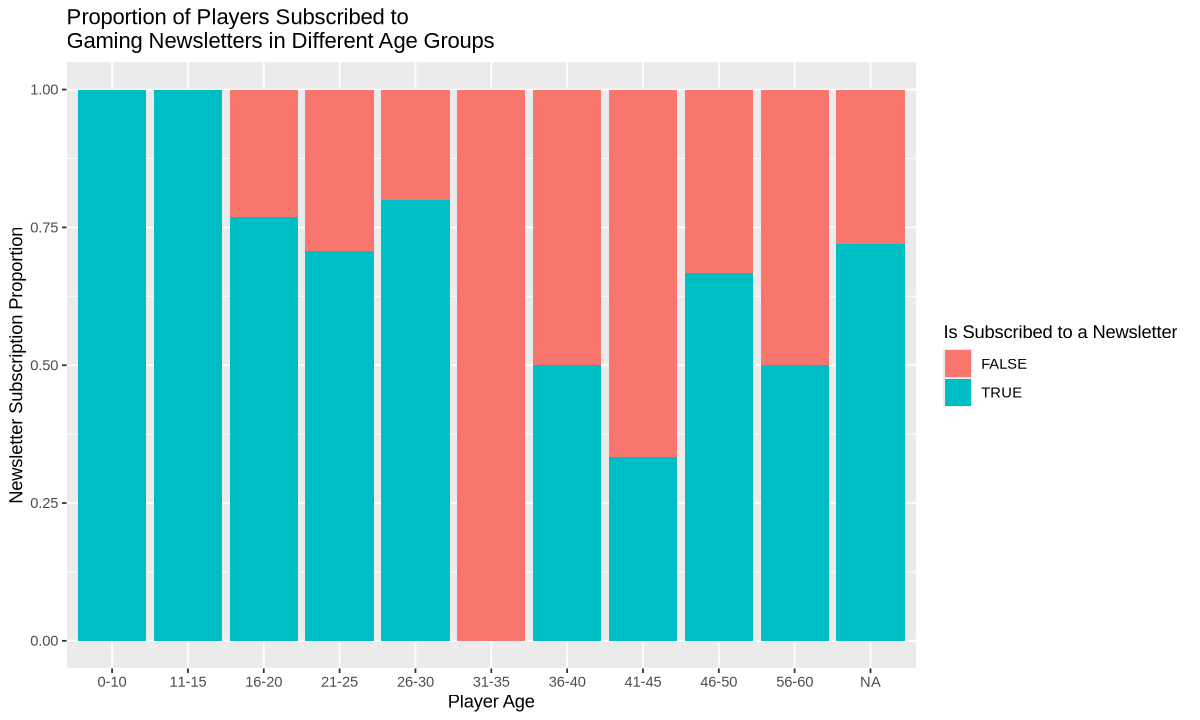

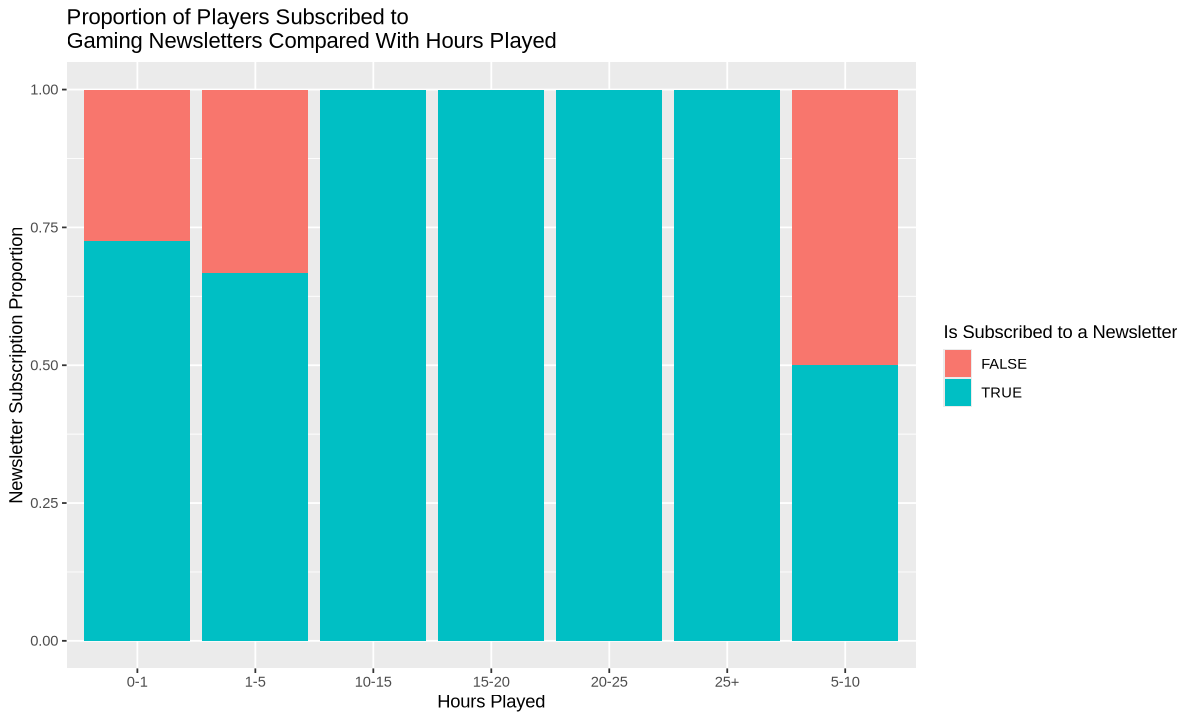

In [24]:
# players.csv is already pretty tidy, I will only rename the hashedEmail column 
# so that the column titles follow similar convention.
tidy_players <- players |>
    rename(hashed_email = hashedEmail)

grouped_players <- tidy_players |>
    mutate(age_group = dplyr::case_when(Age <= 10 ~ "0-10", Age > 10 & Age <= 15 ~ "11-15", 
                                        Age > 15 & Age <= 20 ~ "16-20", 
                                        Age > 21 & Age <= 25 ~ "21-25", 
                                        Age > 26 & Age <= 30 ~ "26-30",
                                        Age > 31 & Age <= 35 ~ "31-35",
                                        Age > 36 & Age <= 40 ~ "36-40",
                                        Age > 41 & Age <= 45 ~ "41-45",
                                        Age > 46 & Age <= 50 ~ "46-50",
                                        Age > 51 & Age <= 55 ~ "51-55",
                                        Age > 56 & Age <= 60 ~ "56-60"),
          hours_group = dplyr::case_when(played_hours <= 1 ~ "0-1",
                                        played_hours > 1 & played_hours <= 5 ~ "1-5",
                                        played_hours > 5 & played_hours <= 10 ~ "5-10",
                                        played_hours > 10 & played_hours <= 15 ~ "10-15",
                                        played_hours > 15 & played_hours <= 20 ~ "15-20",
                                        played_hours > 20 & played_hours <= 25 ~ "20-25",
                                        played_hours > 25 ~ "25+",))

options(repr.plot.width = 10, repr.plot.height = 6) 

players_age_plot <- ggplot(tidy_players, aes(x = played_hours, y = Age, color = subscribe)) +
    geom_point(alpha = 0.4) +
    xlab("Total Hours Played") +
   ylab("Player Age") +
   labs(color = "Is Subscribed to a Newsletter") +
   ggtitle("The Total Hours Played vs. Player Age and 
Whether the Player is Subscribed to a Gaming Newsletter")

players_age_bar_plot <- grouped_players |>
   ggplot(aes(x = age_group, fill = subscribe)) + 
   geom_bar(position = 'fill') + 
   xlab("Player Age") +
   ylab("Newsletter Subscription Proportion") +
   labs(fill = "Is Subscribed to a Newsletter") +
   ggtitle("Proportion of Players Subscribed to 
Gaming Newsletters in Different Age Groups")

players_hours_bar_plot <- grouped_players |>
   ggplot(aes(x = hours_group, fill = subscribe)) + 
   geom_bar(position = 'fill') + 
   xlab("Hours Played") +
   ylab("Newsletter Subscription Proportion") +
   labs(fill = "Is Subscribed to a Newsletter") +
   ggtitle("Proportion of Players Subscribed to 
Gaming Newsletters Compared With Hours Played")

players_age_plot
players_age_bar_plot
players_hours_bar_plot

Based on the visualizations above, it appears that the majority of players played less than 10 hours, which corrosponds to the mean total hours (5.85). Players who played 10 or more hours on the MineCraft server were all subscribed to a gaming newsletter, and players 15 years old or younger were all subscribed to a gaming newsletter. It may be difficult to use a KNN model on this data to predict using larger playtimes due to the small number of observations and the low average playtime.

### Methods and Plan



To answer this question of interest, I will use a KNN classification model. Classification is the best option because we are predicting a discrete class (TRUE or FALSE) instead of a continuous value. No assumptions need to be made for this model which is ideal since the data does not demonstrate a strong relationship. This model's accuracy will struggle when predicting 'subscribe' larger playtimes and ages, as the data is rather unbalanced and favours smaller playtimes/ages. The dataset is also small, with only 196 observations, so there isn't much data for training. To make the most of the limited data, I will preform a 70%-30% split. The training set will be used to preform a 5 fold k-fold-cross-validation, in order to strengthen the predictive power of the model by finding the ideal value for k.

##### GitHub Link:

https://github.com/Euan-Mushens/Group20DSCIProjectEM.git